In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import f_oneway, chi2_contingency, iqr, ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ztest

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
!pwd

/kaggle/working


Load the Coffee_Shop_Revenue Dataset

In [5]:
df = pd.read_csv('/kaggle/input/coffee-shop-daily-revenue-prediction-dataset/coffee_shop_revenue.csv')

In [6]:
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [7]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [8]:
df.tail()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21
1999,89,6.88,13,14,78.46,322,914.24


In [9]:
df.shape

(2000, 7)

In [10]:
df.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

In [11]:
df.dtypes

Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [13]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


**Checking if there are any missing values (there are no missing values)**

In [14]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

**Univariate Analysis**

Time-Series-Visualisation

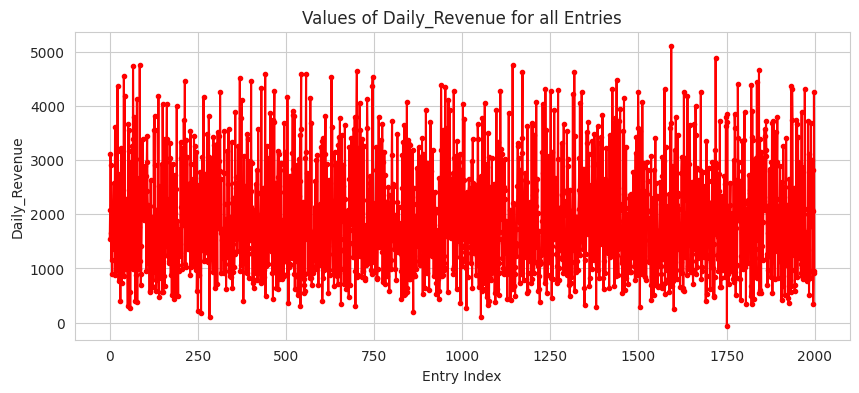

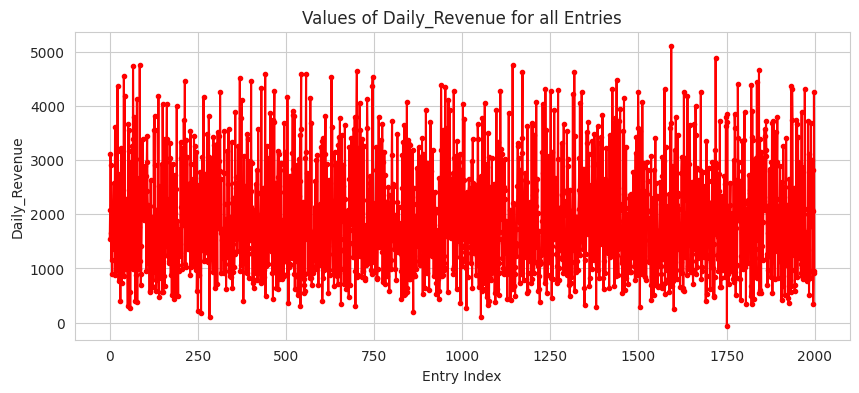

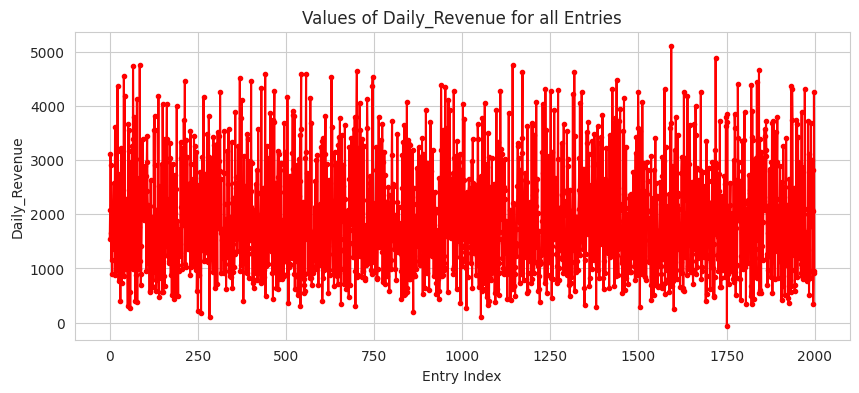

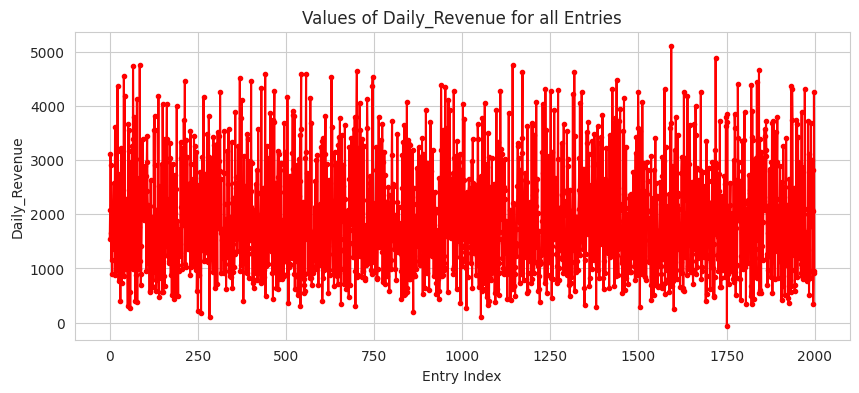

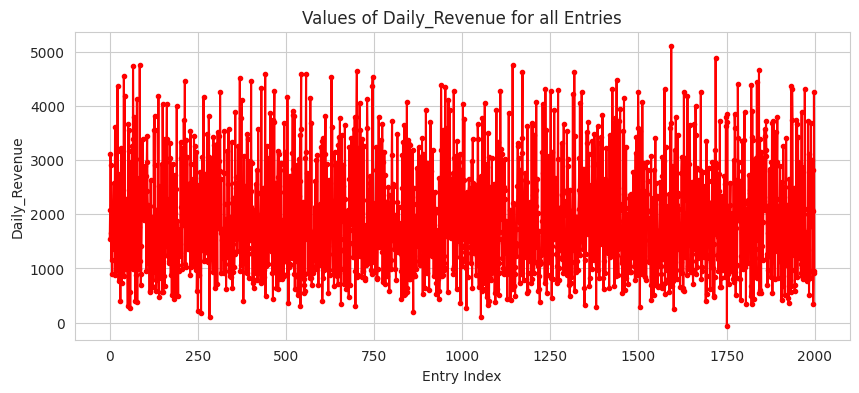

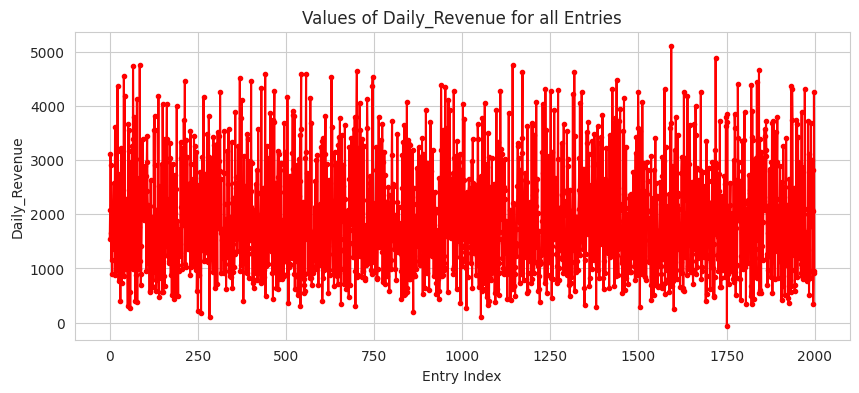

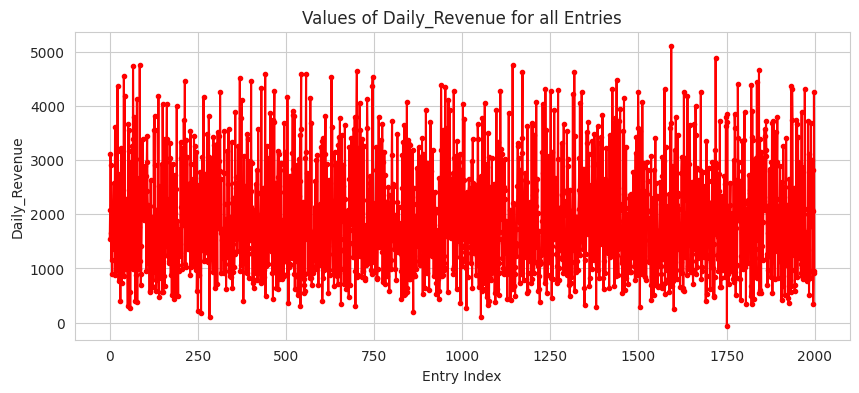

In [18]:
for columns in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col], marker='o', linestyle='-', markersize=3, color='red')
    plt.xlabel("Entry Index")
    plt.ylabel(col)
    plt.title(f"Values of {col} for all Entries")
    plt.show()

Histogram plot, Violin plot and Bar plot for each variable


### Statistics for Number_of_Customers_Per_Day ###

count    2000.000000
mean      274.296000
std       129.441933
min        50.000000
25%       164.000000
50%       275.000000
75%       386.000000
max       499.000000
Name: Number_of_Customers_Per_Day, dtype: float64


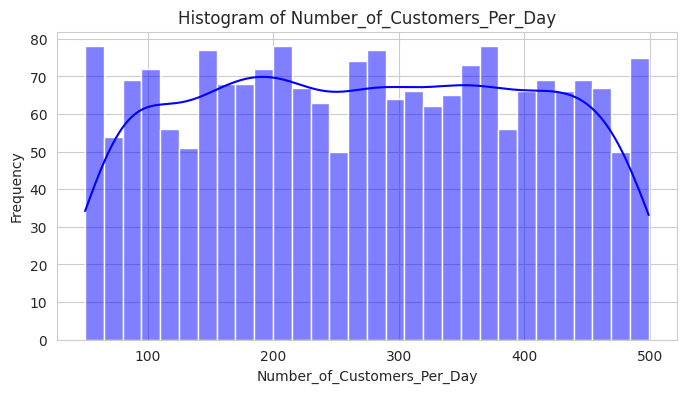


### Statistics for Average_Order_Value ###

count    2000.000000
mean        6.261215
std         2.175832
min         2.500000
25%         4.410000
50%         6.300000
75%         8.120000
max        10.000000
Name: Average_Order_Value, dtype: float64


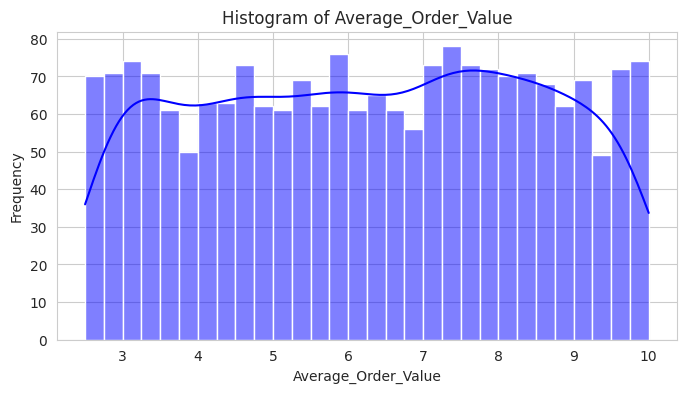


### Statistics for Operating_Hours_Per_Day ###

count    2000.000000
mean       11.667000
std         3.438608
min         6.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: Operating_Hours_Per_Day, dtype: float64


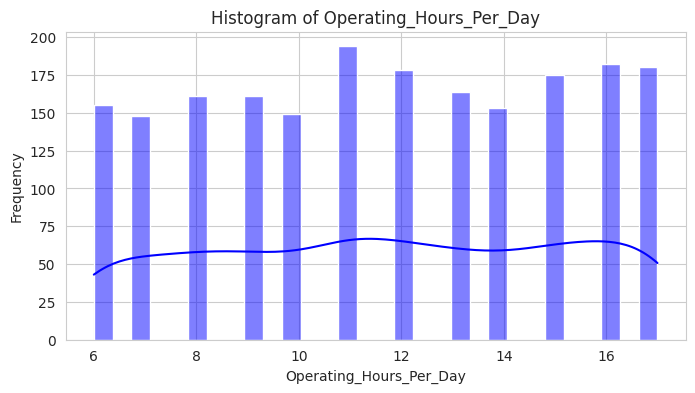


### Statistics for Number_of_Employees ###

count    2000.000000
mean        7.947000
std         3.742218
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: Number_of_Employees, dtype: float64


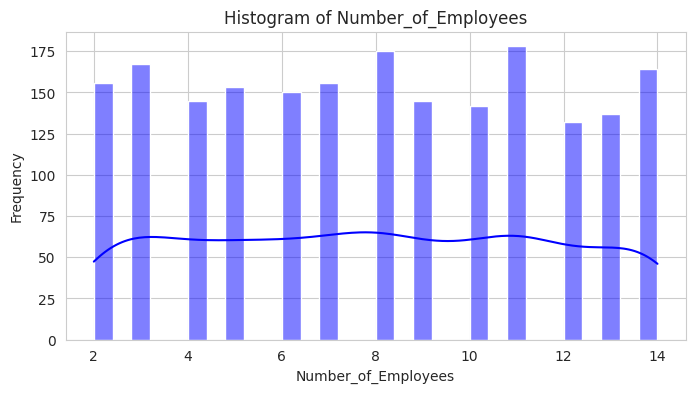


### Statistics for Marketing_Spend_Per_Day ###

count    2000.000000
mean      252.614160
std       141.136004
min        10.120000
25%       130.125000
50%       250.995000
75%       375.352500
max       499.740000
Name: Marketing_Spend_Per_Day, dtype: float64


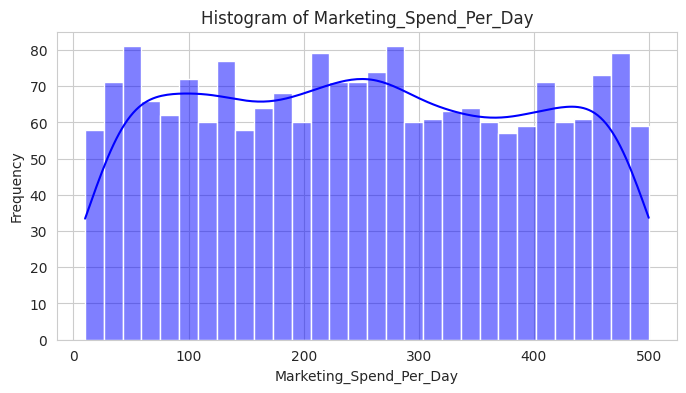


### Statistics for Location_Foot_Traffic ###

count    2000.000000
mean      534.893500
std       271.662295
min        50.000000
25%       302.000000
50%       540.000000
75%       767.000000
max       999.000000
Name: Location_Foot_Traffic, dtype: float64


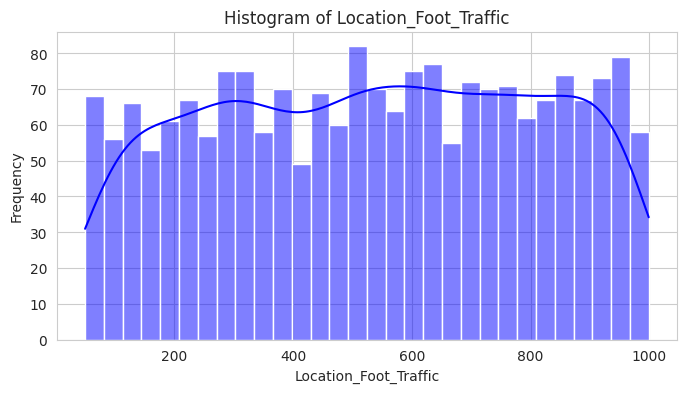


### Statistics for Daily_Revenue ###

count    2000.000000
mean     1917.325940
std       976.202746
min       -58.950000
25%      1140.085000
50%      1770.775000
75%      2530.455000
max      5114.600000
Name: Daily_Revenue, dtype: float64


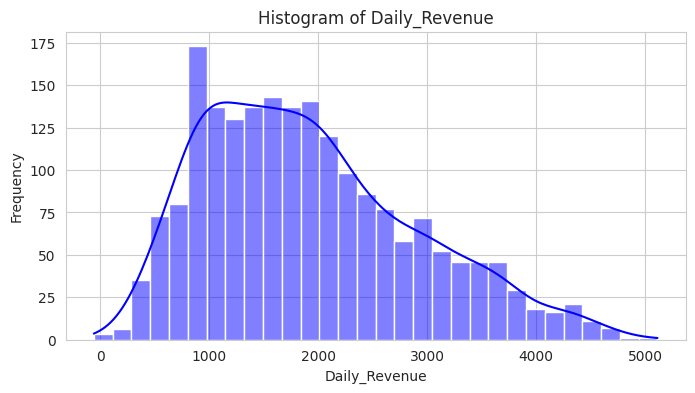

In [19]:
sns.set_style("whitegrid")

# Loop through each numerical column
for col in df.columns:
    print(f"\n### Statistics for {col} ###\n")
    print(df[col].describe())  # Print individual stats
    
    # Plot histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='blue')  # Histogram with KDE
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

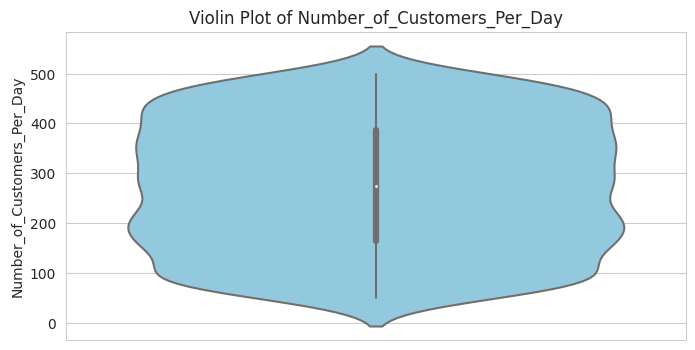

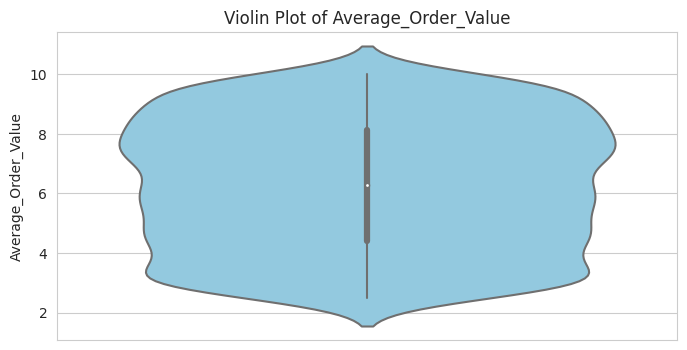

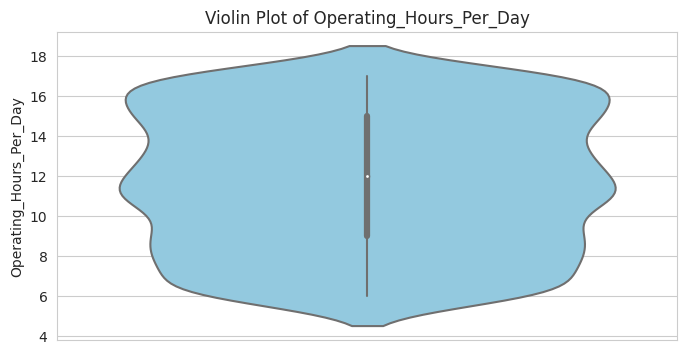

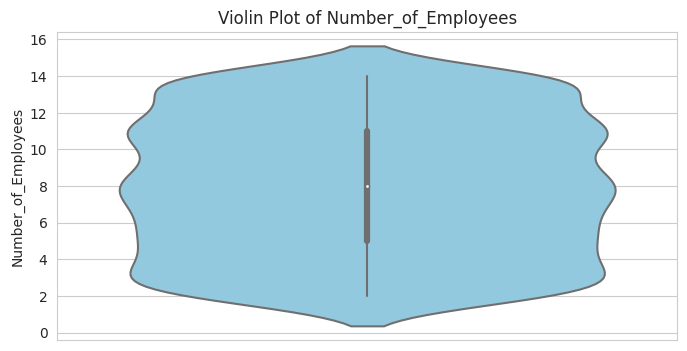

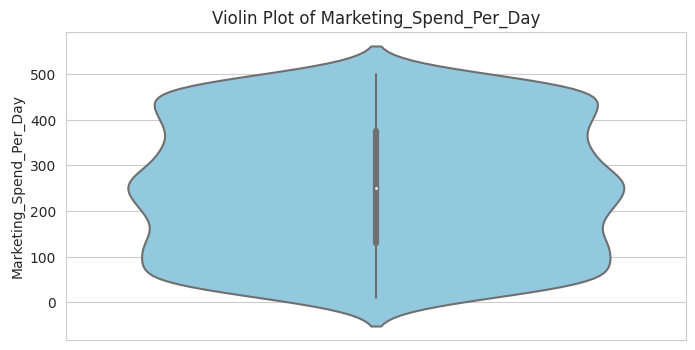

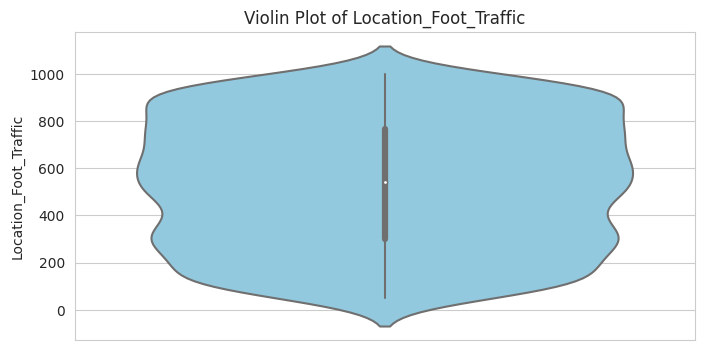

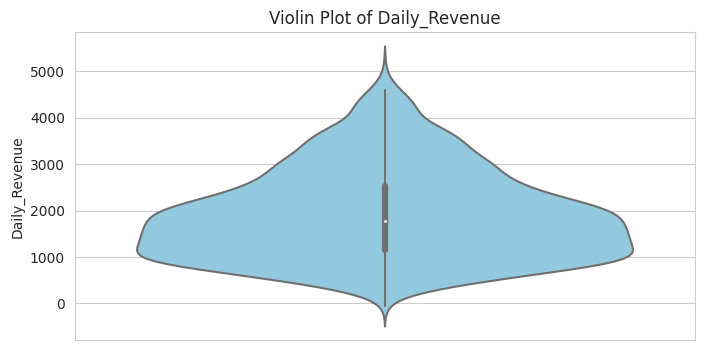

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

## 🔹 Loop through Each Column and Plot Violin & Box Plots Individually 🔹
for col in num_cols:
    # Violin Plot
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)
    plt.show()


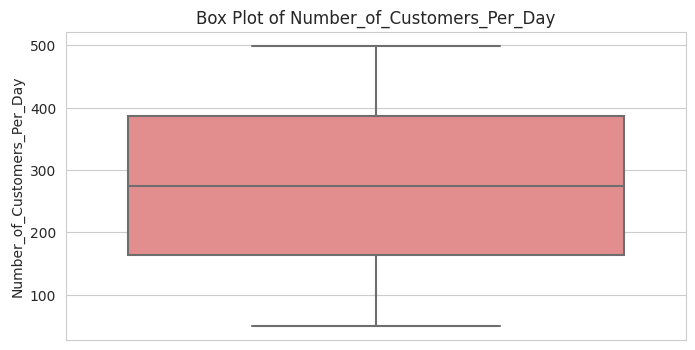

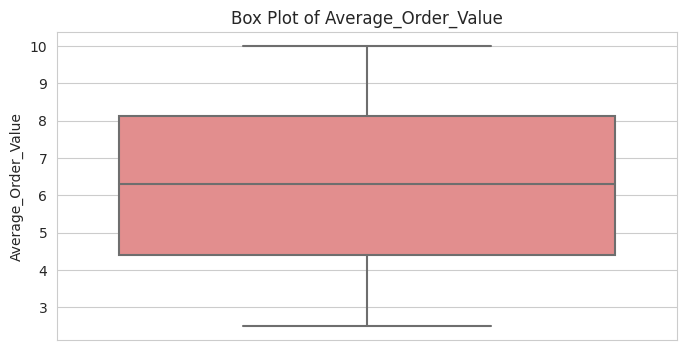

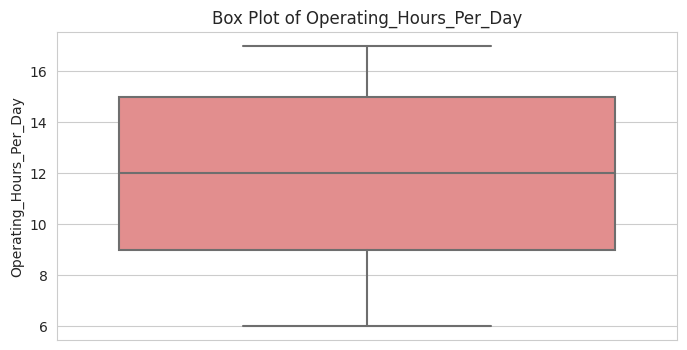

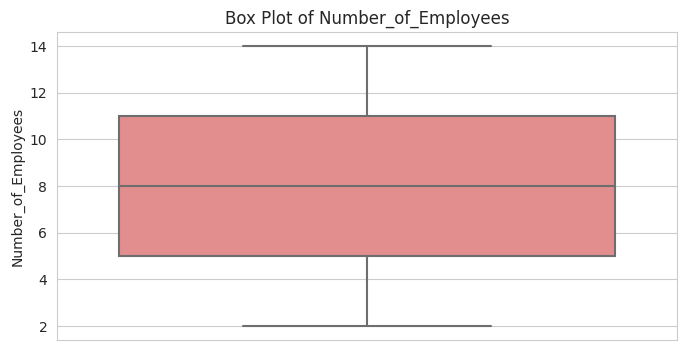

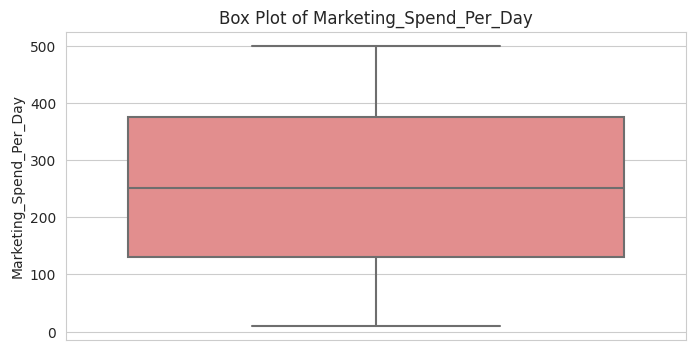

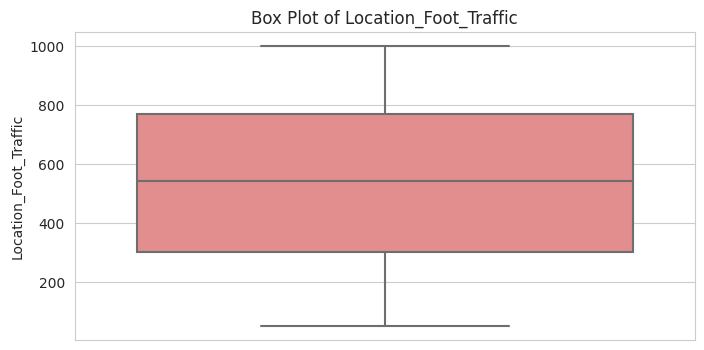

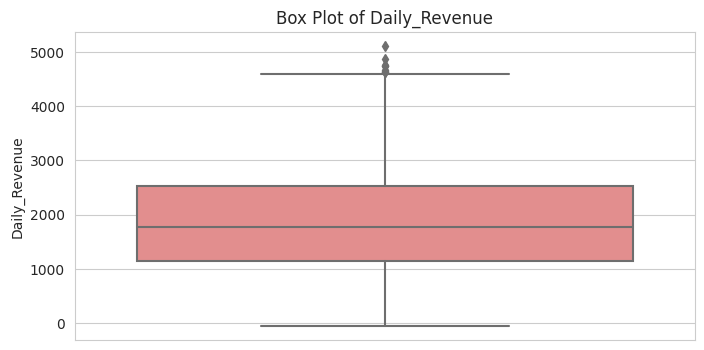

In [24]:
# Box Plot
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

**Multivariate Analysis**

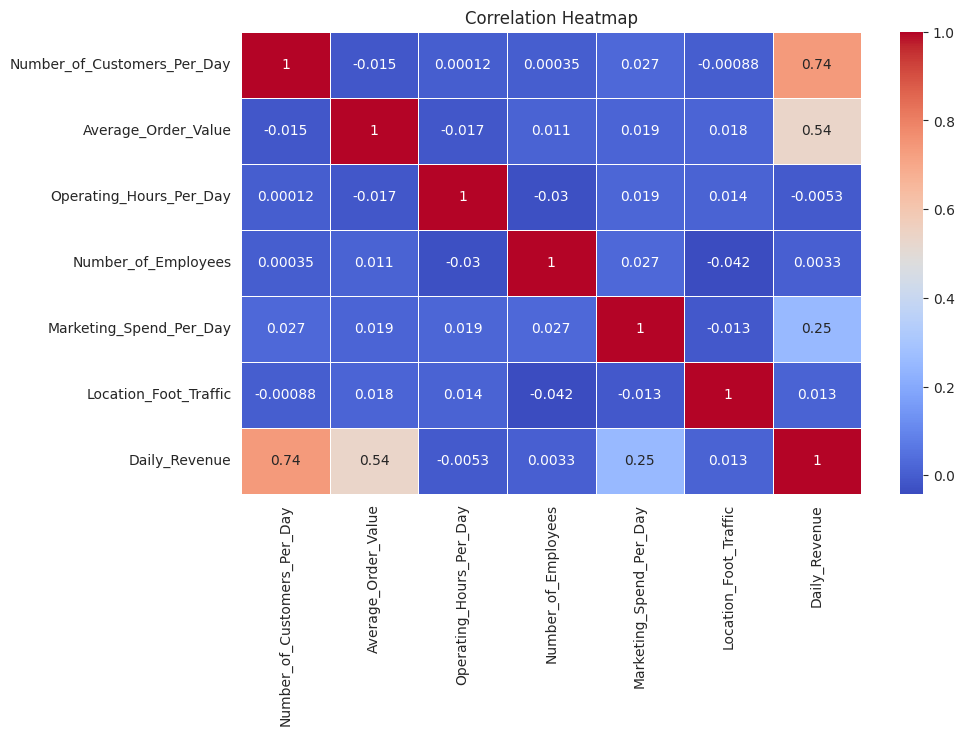

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Conclusions- 
1) We see that the Daily revenue is highly affected by number of customers per day and hardly affected by number of employees per day. 
2) Surprisingly , the daily revenue has a slight negative correlation with operating_hours_per_day


**Plotting daily revenue with each column**

<Figure size 800x400 with 0 Axes>

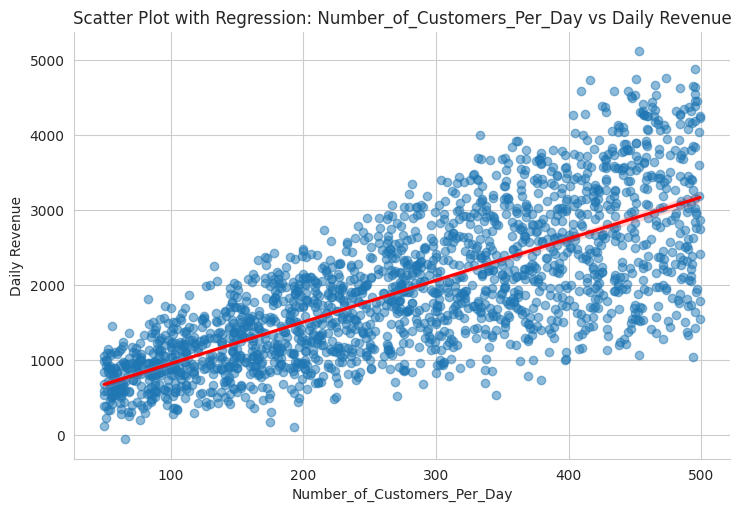

<Figure size 800x400 with 0 Axes>

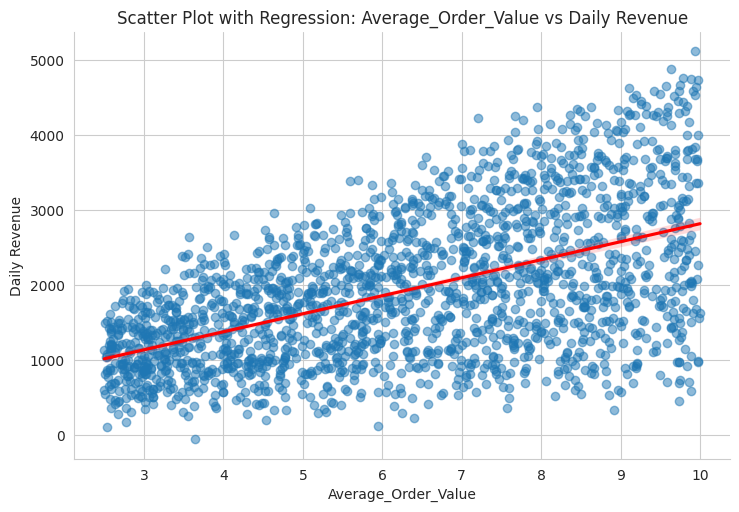

<Figure size 800x400 with 0 Axes>

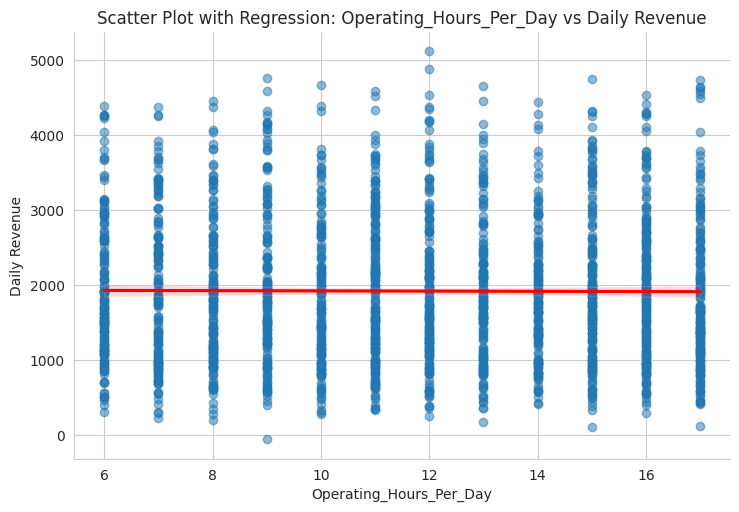

<Figure size 800x400 with 0 Axes>

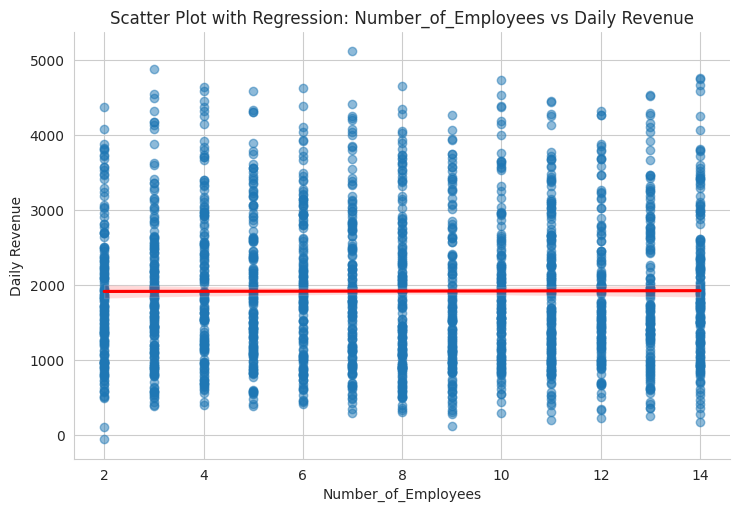

<Figure size 800x400 with 0 Axes>

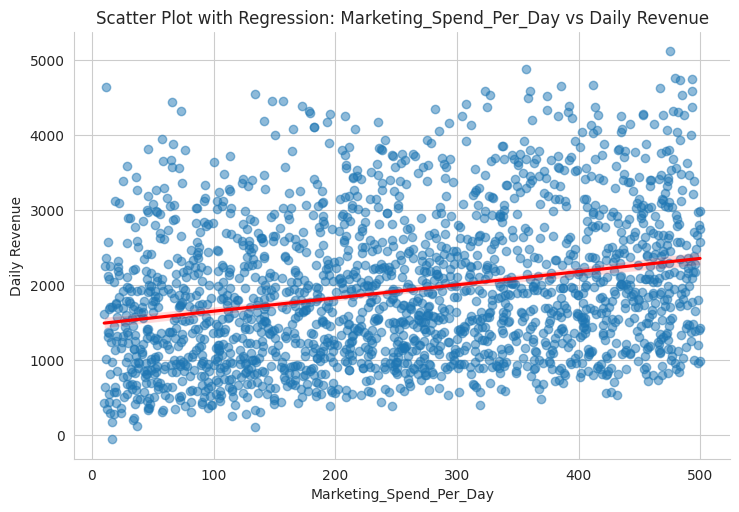

<Figure size 800x400 with 0 Axes>

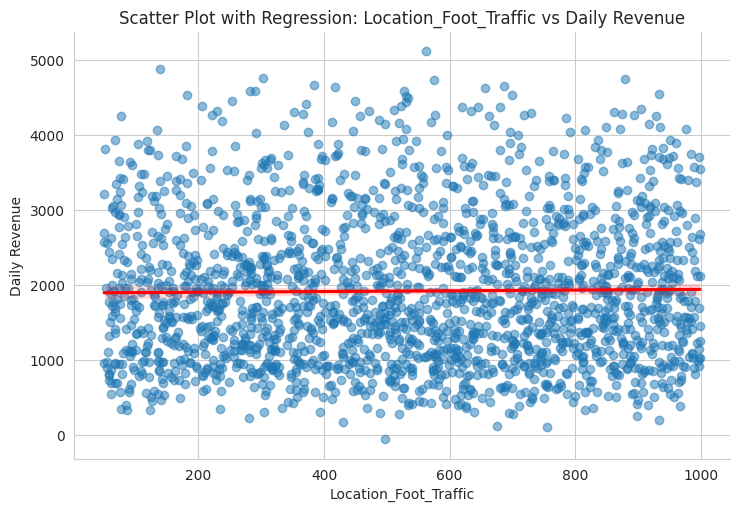

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove 'Daily_Revenue' from the independent variables
num_cols = num_cols.drop("Daily_Revenue")

# Loop through each numerical column and plot regression line
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.lmplot(x=col, y="Daily_Revenue", data=df, height=5, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f"Scatter Plot with Regression: {col} vs Daily Revenue")
    plt.xlabel(col)
    plt.ylabel("Daily Revenue")
    plt.show()

We see that daily revenue increases with number of customers per day, average order value and marketing spend per day . The effect of other parameters i.e. Location_Foot_Traffic, operating hours per day and no. of employees is negligible